# Problema del cubo

Los vértices de un cubo se numeran del 1 al 8 de manera que el resultado de sumar los cuatro números de cada cara es el mismo para todas las caras. Se han colocado ya los números 1, 4 y 6 como se muestra en la figura. **¿Qué número va en el vértice marcado con x?**

<center>
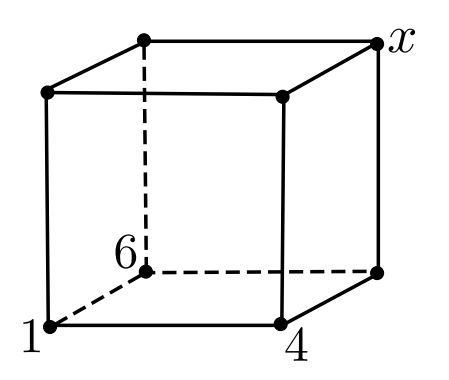
</center>

## Definición de variables

In [29]:
from itertools import product
from collections import deque

In [30]:
class Variable:
    def __init__(self, id_, domain):
        self.id = id_
        self.domain = domain
    def __str__(self):
        return f'{self.id} -> {self.domain}'

En este caso nuestras variables serán los vertices del cubo, por lo tanto, primero debemos asignar nombre a cada uno de los vertices. Esto se hace para poder definirlos y diferenciarlos durante el algoritmo.

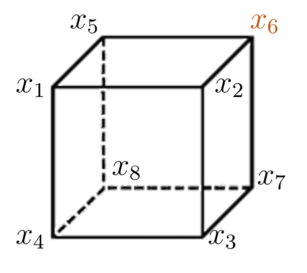


Definimos los valores para cada variable, considerando que algunos vertices ya tienen un valor asignado

In [31]:
values = [['X1', [1,2,3,4,5,6,7,8]],
    ['X2', [1,2,3,4,5,6,7,8]],
    ['X3', [4]],
    ['X4', [1]],
    ['X5', [1,2,3,4,5,6,7,8]],
    ['X6', [1,2,3,4,5,6,7,8]],
    ['X7', [1,2,3,4,5,6,7,8]],
    ['X8', [6]]]

In [32]:
variables = {}
for item in values:
    variables[item[0]] = Variable(*item)

In [33]:
for v in variables:
    print(variables[v])

X1 -> [1, 2, 3, 4, 5, 6, 7, 8]
X2 -> [1, 2, 3, 4, 5, 6, 7, 8]
X3 -> [4]
X4 -> [1]
X5 -> [1, 2, 3, 4, 5, 6, 7, 8]
X6 -> [1, 2, 3, 4, 5, 6, 7, 8]
X7 -> [1, 2, 3, 4, 5, 6, 7, 8]
X8 -> [6]


## Definición de restricciones

Para este problema tenemos dos restricciones claramente establecidas en las instrucciones

En primer lugar se menciona que la suma de los vertices de las caras debe ser la misma, esto se puede expresar de la siguiente forma:

$$x1 + x2 + x3 + x4 = x5 + x6 + x7 + x8 = x2 + x3 + x6 + x7 = x3 + x4 + x7 + x8 = x1 + x4 + x5 + x8 =  x4 + x3 + x7 + x8$$

Por otro lado, ningún vértice puede repetir asignación de número, por lo tanto:

$$ x1 \neq x2 \neq  x3 \neq  x4 \neq  x5 \neq  x6 \neq  x7 \neq  x8 $$

In [34]:
def equal_sum(x1, x2, x3, x4, x5, x6, x7, x8):
    sums = [
        x1 + x2 + x3 + x4,
        x5 + x6 + x7 + x8,
        x2 + x3 + x6 + x7,
        x3 + x4 + x7 + x8,
        x1 + x4 + x5 + x8,
        x4 + x3 + x7 + x8
    ]
    return len(set(sums)) == 1
    
def all_different(x1, x2, x3, x4, x5, x6, x7, x8):
    return len(set([x1, x2, x3, x4, x5, x6, x7, x8])) == 8
    

In [35]:
class Constrain:
    def __init__(self, id_, rel_variables, func):
        self.id = id_
        self.related_variables = rel_variables
        self.function = func

In [36]:
constraints_values = [ ['R01', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], equal_sum],
                       ['R02', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], all_different]]

In [37]:
constrains = {}
for item in constraints_values:
    constrains[item[0]] = Constrain(*item)

## Reducción de dominio

Creamos todas las aristas *(X, C)* para todas las variables y restricciones

In [38]:
edges = []
for key in constrains:
    for var in constrains[key].related_variables:
        if (var, key) not in edges:
            edges.append((var, key))

Realizamos el algoritmo AC-3 para la consistencia de arco

In [39]:
edges_deque = deque(edges)
while(edges_deque):
    variable_name, constraint_name = edges_deque.popleft()

    for value in list(variables[variable_name].domain):
        valid = False
        for combination in product(*[variables[v].domain if v != variable_name else [value] for v in constrains[constraint_name].related_variables]):
            if constrains[constraint_name].function(*combination):
                valid = True
                break
        if not valid:
            variables[variable_name].domain.remove(value)
            
            related_cons = [constrain for variable, constrain in edges if variable == variable_name]
            affected_edges = [(v, c) for v, c in edges if c in related_cons and v != variable_name]
            edges_deque += deque([edge for edge in affected_edges if edge not in edges_deque])
        

Imprimimos los valores restantes después de la reducción de dominio

In [40]:
for v in variables:
    print(variables[v])

X1 -> [8]
X2 -> [5]
X3 -> [4]
X4 -> [1]
X5 -> [3]
X6 -> [2]
X7 -> [7]
X8 -> [6]


## Búsqueda

En este caso como cada variable sólo tiene un valor restante, sólo tenemos una combinación por probar. Si esta combinación cumple con las restricciones, entonces la solución es la combinación. En caso contrario, el problema no tendría solución.

In [41]:
equal_sum(8,5,4,1,3,2,7,6) and all_different(8,5,4,1,3,2,7,6)

True

Por lo tanto la solución es esa única asignación posible

In [42]:
for v in variables:
    print(f'{v}: {variables[v].domain[0]}')

X1: 8
X2: 5
X3: 4
X4: 1
X5: 3
X6: 2
X7: 7
X8: 6


Y respondiendo a la pregunta del problema, el vertice marcado con una $x$ (que corresponde a nuestra variable $x_{6}$) debe tomar el valor **2** para cumplir con las restricciones del problema 